## Dimensionalidad y Agrupación

Pasos:
- Analizo la correlación con factor_analyzer. Quito del analisis las variables que son combinaciones de otras variables ya que no aportan informacion extra.
- Aplico test de barlett que identifica si los datos son esfericos, en cuyo caso no es posible disminuir la dimensionalidad.
H0: matriz de var y cov es una identidad
- Sino lo son (no esfericos) hay datos que explican más que otros y esto lo puedo saber con KAISER_MEYER_OLKIN(KMO)
Muestra la importancia de las regresoras
- Cuantas variables necesitamos con SCREET PLOT

### Diccionario: 
    
Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de
personalidad en base a una serie de oraciones asociadas a las características Amabilidad, Escrupolisidad, Extroversión, Neuroticismo, Apertura Los individuos deben responder qué tan
adecuada es la oración respecto a su personalidad en base a 6 categorías:
- 1: No me representa para nada.
- 2: No me representa.
- 3: Algunas cosas no me representan.
- 4: Algunas cosas me representan.
- 5: Me representa.
- 6: Me representa completamente.

Las 25 preguntas son:
- A1 Soy indiferente a los sentimientos de otros.
- A2 Me preocupo del bienestar de otros.
- A3 Sé cómo confortar a otros.
- A4 Me agradan los niños.
- A5 Hago sentir tranquila a la gente.

- C1 Soy exacto en mi trabajo.
- C2 Sigo con mis tareas hasta que todo esté perfecto.
- C3 Hago cosas siguiendo un plan.
- C4 Hago cosas con el mínimo esfuerzo.
- C5 Pierdo mi tiempo.

- E1 No hablo mucho con las personas.
- E2 Me es dificil acercarme a otros.
- E3 Sé cómo cautivar gente.
- E4 Hago amigos de forma fácil.
- E5 Puedo tomar el cargo de las cosas.

- N1 Me enojo con facilidad.
- N2 Me irrito con facilidad.
- N3 Tengo cambios de humor frecuentes.
- N4 Usualmente me siento melancólico.
- N5 Entro en pánico con facilidad.

- O1 Estoy lleno de ideas.
- O2 Evito leer material difícil.
- O3 Tiendo a llevar la conversación a niveles más altos.
- O4 Dedico tiempo a la reflexión de cosas.
- O5 No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:
- gender Hombre = 1, Mujer =2.
- education 1 = Educación Media Incompleta, 2 = Educación Media - Completa, 3 = Educación
- Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
- age Edad en Años.

Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.

In [1]:
#!pip install factor_analyzer

In [2]:
#!pip install missingno

### Desafío 1: 


- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos bfi.csv y asígnela a un objeto df.
- Solicite las primeras 5 observaciones con head.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import factor_analyzer as fa
import missingno as msg
#from anc_functions import dotplot
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('bfi.csv')

In [5]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2: 


- Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .

In [6]:
df = df.drop(columns=["Unnamed: 0"])

- Analice el patrón de datos perdidos con missingno.
- Comente cuáles son las principales variables con mayores tasas de valores perdidos.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

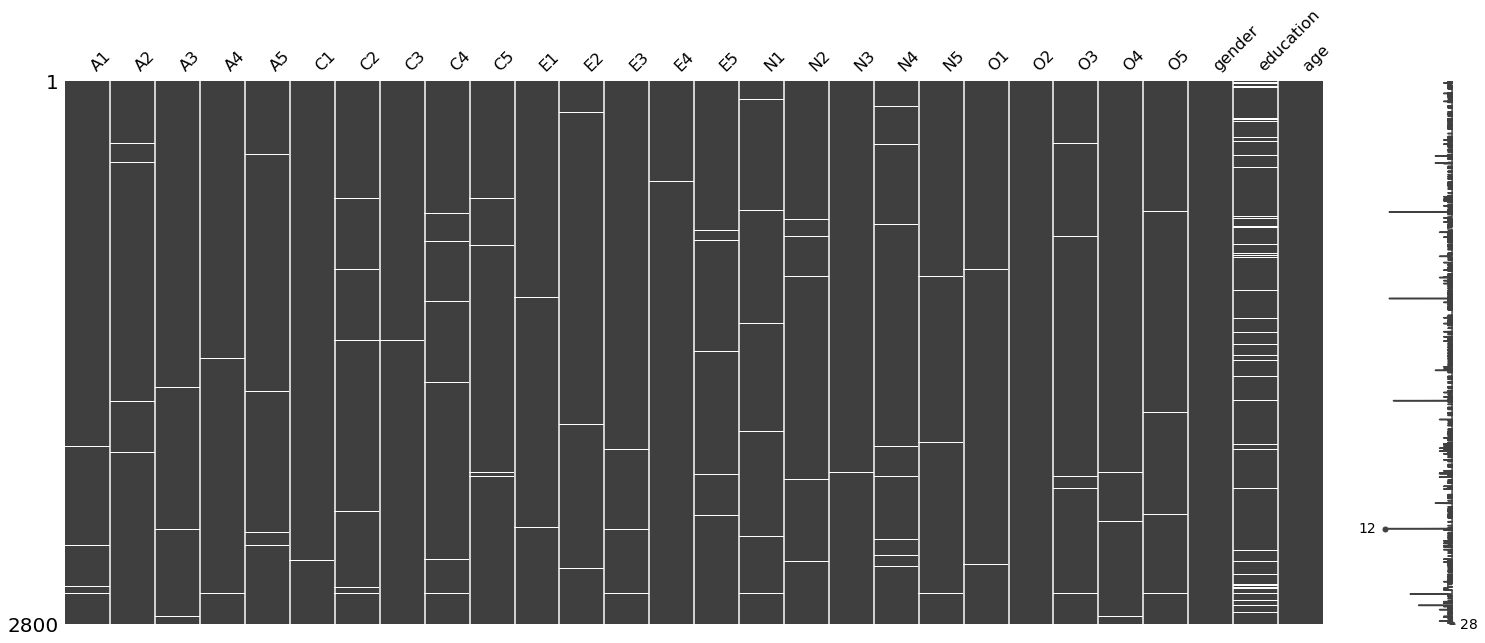

In [7]:
msg.matrix(df)

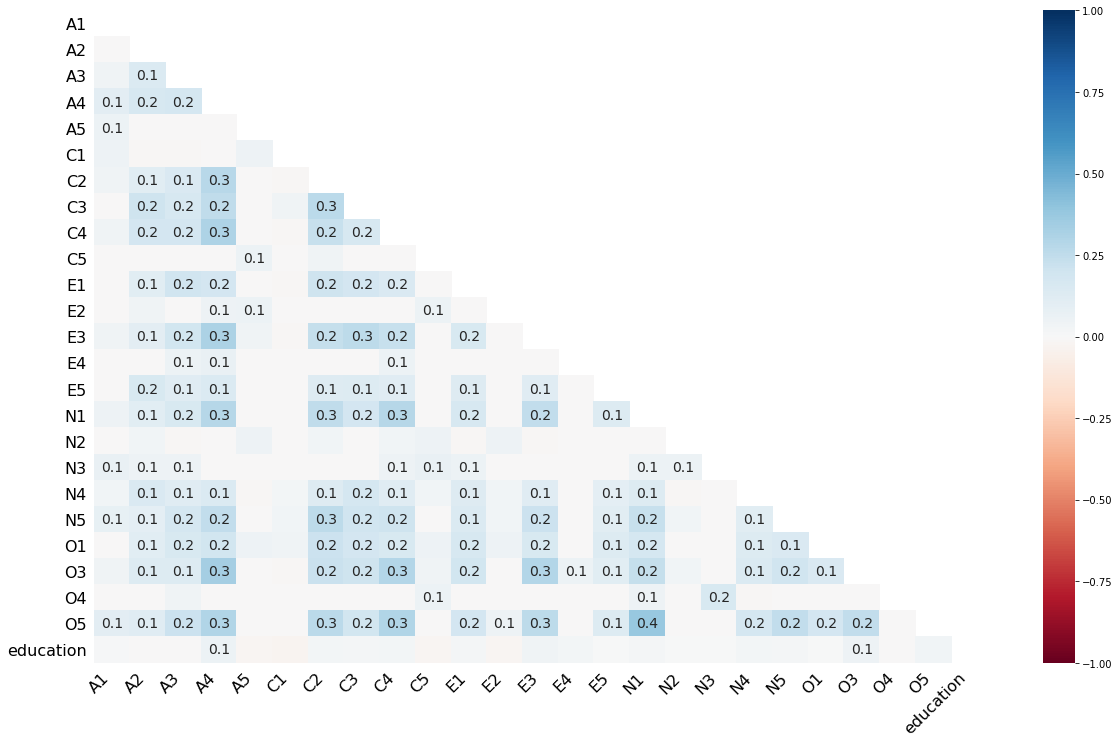

In [8]:
msg.heatmap(df)

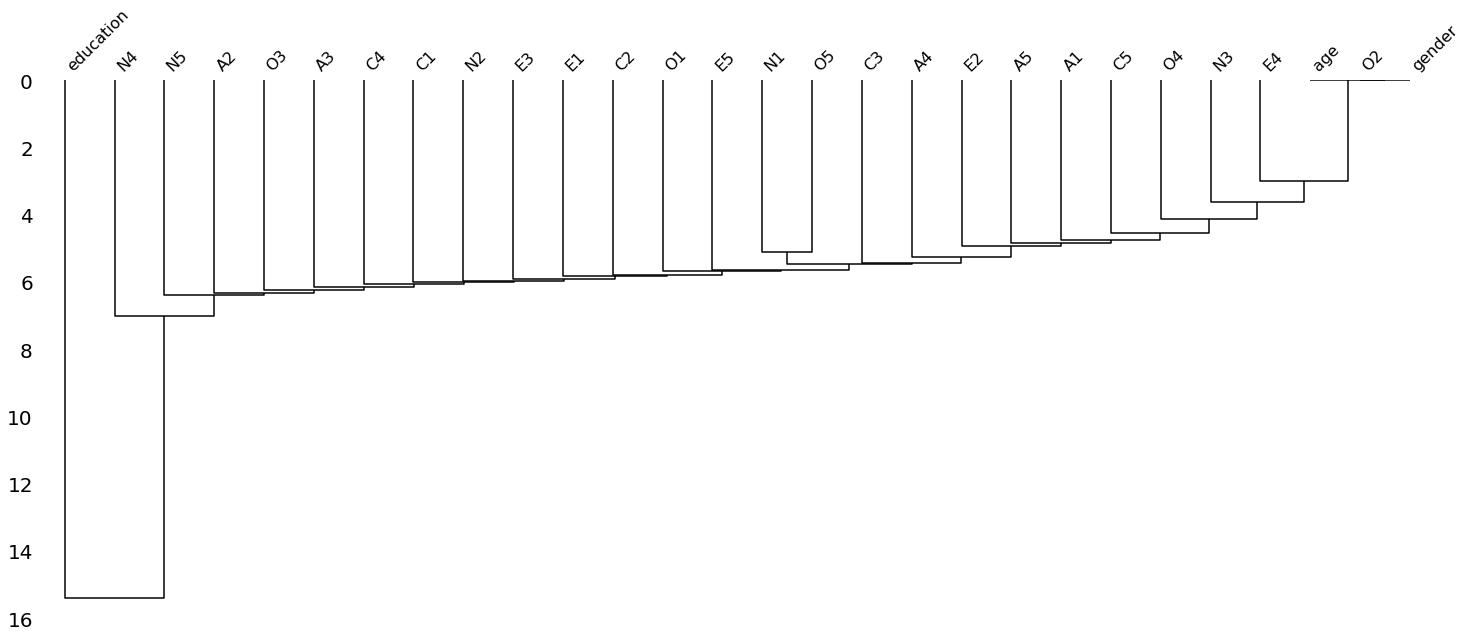

In [9]:
msg.dendrogram(df)

In [10]:
column = []
porcentaje = []

for i in df.columns:
    column.append(i)
    porcentaje.append(len(df[df[i].isnull()]) / len(df))

df_aux = pd.DataFrame({"column": column, "porcentaje": porcentaje}).set_index("column")
df_aux.sort_values("porcentaje", ascending = False).head()

,porcentaje
column,
education,0.079643
N4,0.012857
N5,0.010357
O3,0.010000
A2,0.009643


In [11]:
df = df.dropna()

### Desafío 3: 

- Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
- Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap .
- Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [12]:
df_preguntas = df.loc[:,"A1":"O5"]

In [13]:
df_otro = df[["gender","education","age"]]

In [14]:
# plt.plot(df["A1"].mean(), marker ="*", linewidth=0, color="blue", markersize=7, label="A1")
# plt.plot(df["A2"].mean(), marker ="*", linewidth=0, color="red", markersize=7, label="A1")

In [15]:
lista = []
for i in df_preguntas.columns:
    print(i)
    lista.append({
        "nombre":i,
        "media": df[i].mean()
    })

A1
A2
A3
A4
A5
C1
C2
C3
C4
C5
E1
E2
E3
E4
E5
N1
N2
N3
N4
N5
O1
O2
O3
O4
O5


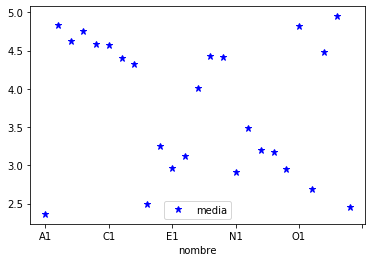

In [16]:
df_aux = pd.DataFrame(lista).set_index("nombre").plot(marker ="*", linewidth=0,color="blue", markersize=7, label="A1")

In [17]:
#plt.plot(df_aux.index, df_aux["medias"], marker ="*", color= "red", linewidth=0)

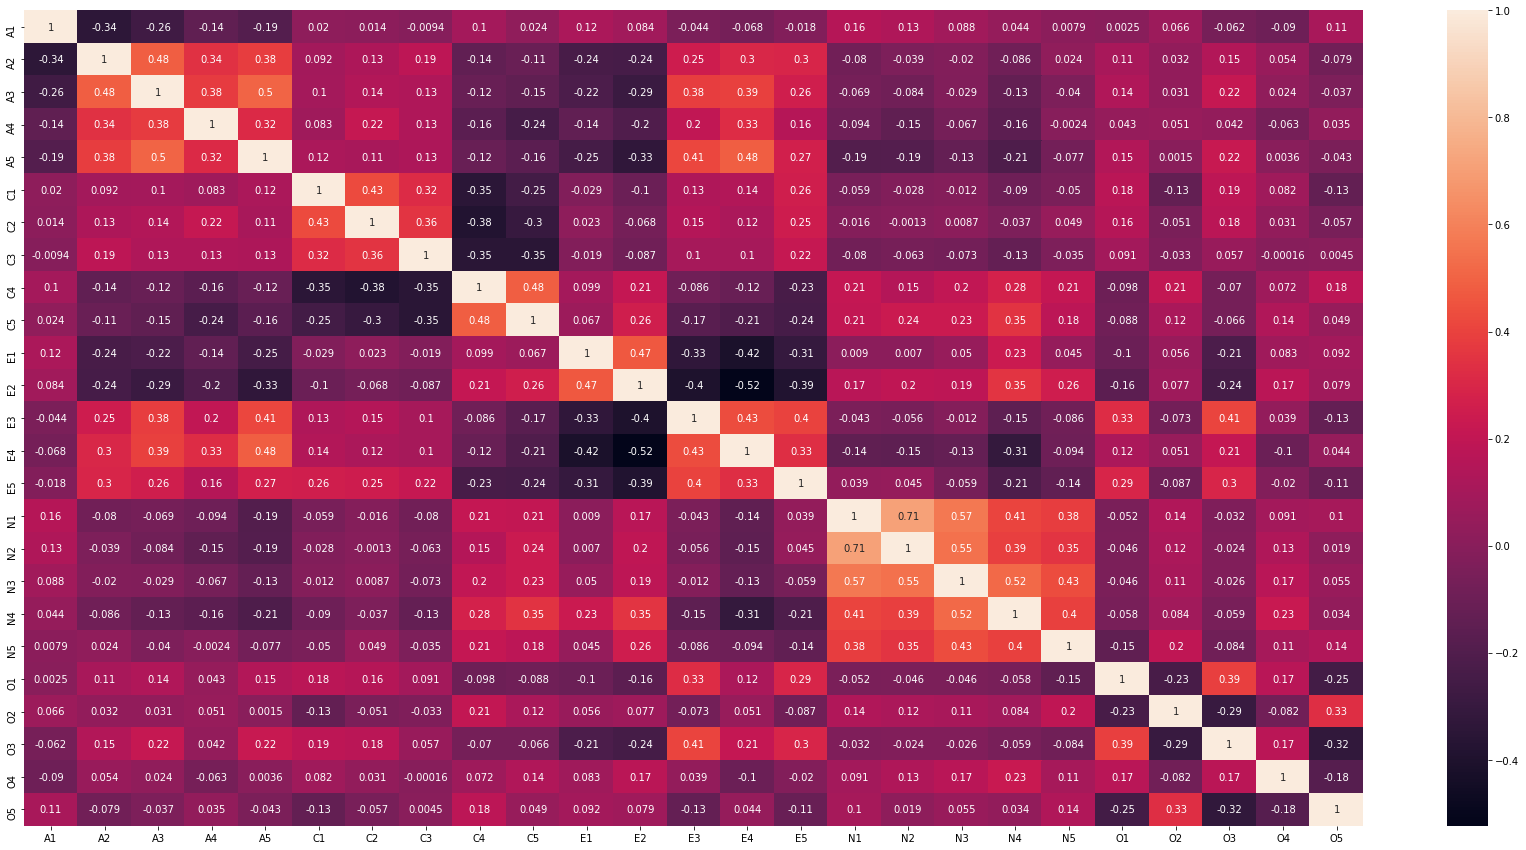

In [18]:
plt.figure(figsize=(30,15))
sns.heatmap(df_preguntas.corr(), annot = True)

Conclusiones: Correlaciones altos y sus relaciones.
- N1-"Me enojo con facilidad" y N2- "Me irrito con facilidad" tienen una correlacion positiva, es decir, existe una fuerza de asociación entre ambas variables fuerte y positiva. 
- E2- "Me es dificil acercarme a otros" y E4-"Hago amigos de forma fácil." tienen una correlacion negativa, es decir, las variables se movilizar en forma inversa.

### Desafío 4: 


- Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas
para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-MeyerOlkin. Comente los resultados.
- Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no
se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones
estimables.
- Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas
que informó el scree plot.
- Extraiga las cargas del modelo e identifique qué items están asociados a cada factor.
Comente sobre qué significa cada factor construído.


In [19]:
fa.calculate_bartlett_sphericity(df_preguntas)

(16509.673550497202, 0.0)

Como el p-value menor alpha se rechaza la HO de que la matriz de correlaciones es parecida a una identidad.

In [20]:
fa.calculate_kmo(df_preguntas)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

Cuando los factores tenian una correlacion por encima de 0,7 se continua con el analisis

In [21]:
factor_analyzer_obj = fa.FactorAnalyzer(rotation = None, n_factors = 10)
analyzer = factor_analyzer_obj.fit(df_preguntas)

In [22]:
eigen = pd.Series(analyzer.get_eigenvalues()[0])

In [23]:
eigen.index

RangeIndex(start=0, stop=25, step=1)

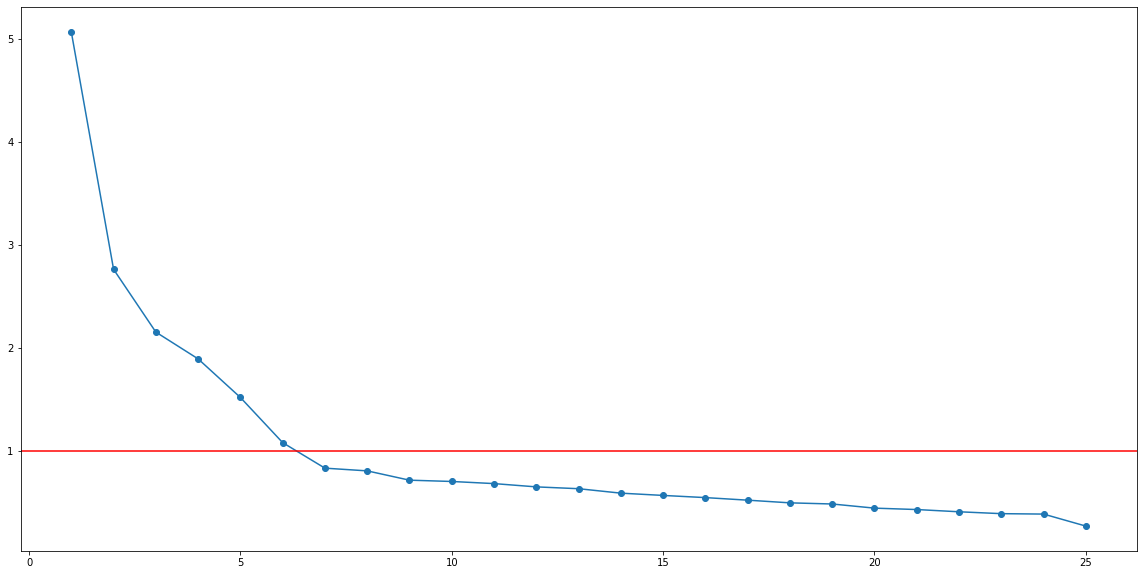

In [24]:
plt.figure(figsize = (20,10))
plt.plot(eigen.index +1 , eigen.values, "o-")
plt.axhline(1, color = "red")
#Reduccion es en 6 

In [25]:
print("La suma de la cantidad de puntos por arriba del 1 es la cantidad de variables latentes que debemos incorporar.")

La suma de la cantidad de puntos por arriba del 1 es la cantidad de variables latentes que debemos incorporar.


In [26]:
factor_analyzer_obj = fa.FactorAnalyzer(rotation = None, n_factors = 6)
analyzer = factor_analyzer_obj.fit(df_preguntas)

In [27]:
loadings = analyzer.loadings_
len(loadings)

25

In [28]:
#Para ver las librerias instaladas
#!pip freeze

In [29]:
df_loadings =pd.DataFrame(loadings, index= df_preguntas.columns)

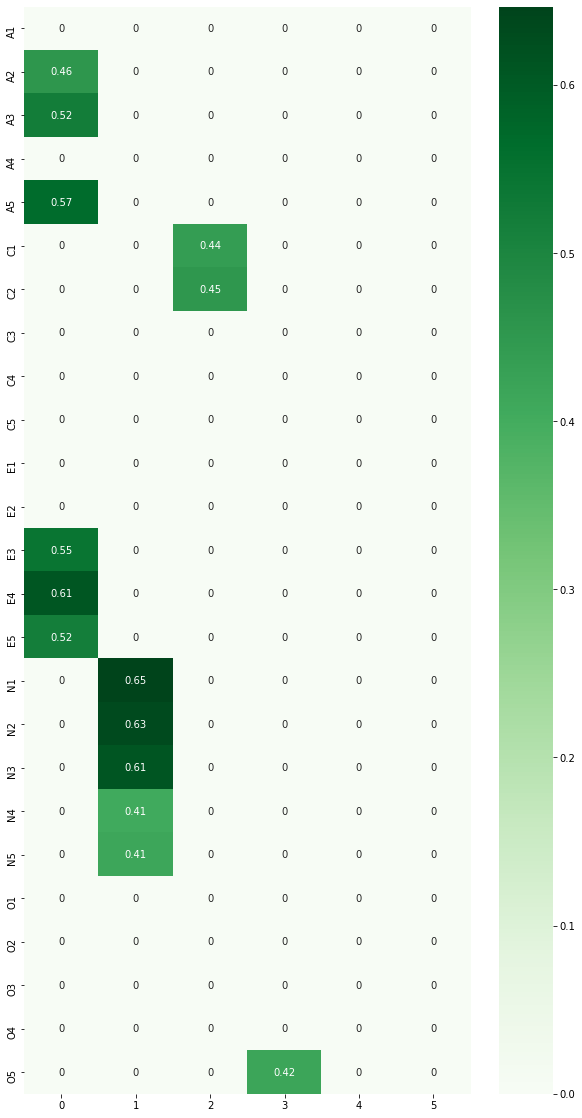

In [30]:
plt.figure(figsize = (10,20))
sns.heatmap(df_loadings.applymap(lambda x: np.where(x < .4, 0,x)), annot = True, cmap = "Greens")

Resumen: Con este grafico vemos con que factores y variables nos quedamos.
- Factores: 0, 1, 2 
- Variables: A1, A4, C3, C4, C5, E1, E2, O1, O2, O3, O4, 
O5


Elimino los factores  4 y 5 porque no me explican.

### Desafío 5: 

- Extraiga los puntajes del modelo factorial a su base de datos.

In [31]:
transform = analyzer.transform(df_preguntas)

In [32]:
df_preguntas= df_preguntas[["A1","A4","C3","C4","C5","E1","E2","O1","O2","O3","O4", 
"O5"]]

In [33]:
df_preguntas["factor1"] = transform[:,0]
df_preguntas["factor2"] = transform[:,1]
df_preguntas["factor3"] = transform[:,2]

In [34]:
df_preguntas

,A1,A4,C3,C4,C5,E1,E2,O1,O2,O3,O4,O5,factor1,factor2,factor3
5,6.0,6.0,6.0,1.0,3.0,2.0,1.0,4.0,3,5.0,6.0,1.0,1.104750,0.710607,0.777228
7,4.0,5.0,4.0,2.0,4.0,3.0,6.0,3.0,2,4.0,5.0,3.0,-2.177680,-0.753407,0.511305
10,4.0,6.0,5.0,3.0,2.0,1.0,3.0,5.0,3,5.0,6.0,3.0,-0.015513,-0.195295,-0.403276
14,4.0,2.0,5.0,2.0,2.0,3.0,4.0,5.0,2,5.0,5.0,5.0,-0.273800,-0.804856,0.925969
22,1.0,5.0,2.0,4.0,5.0,2.0,1.0,6.0,1,5.0,5.0,2.0,0.262650,-0.660616,-1.395966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,5.0,6.0,2.0,4.0,5.0,5.0,1.0,4.0,5,5.0,4.0,4.0,-0.160474,1.108751,-0.809948
2793,3.0,1.0,5.0,3.0,4.0,3.0,5.0,6.0,1,4.0,5.0,2.0,-1.788395,0.554649,1.089744
2797,2.0,2.0,5.0,1.0,1.0,2.0,2.0,5.0,1,6.0,4.0,3.0,0.606580,-0.001239,1.153887
2798,5.0,4.0,5.0,2.0,6.0,2.0,2.0,5.0,2,5.0,5.0,1.0,-0.730689,0.595617,1.072681


- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

In [35]:
df_preguntas["age"] =df_otro["age"]

In [36]:
df_preguntas["education"] =df_otro["education"]

In [37]:
df_preguntas["gender"] =df_otro["gender"]

In [38]:
model1 = smf.ols("factor1 ~ age + education + gender",df_preguntas).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                factor1   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     19.25
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.53e-12
Time:                        22:43:02   Log-Likelihood:                -3028.1
No. Observations:                2236   AIC:                             6064.
Df Residuals:                    2232   BIC:                             6087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6681      0.100     -6.654      0.000      -0.865      -0.471
age            0.0108      0.002      5.637      0.000       0.007       0.015
education      0.0138      0.018      0.747      0.455      -0.022       0.050
gender         0.1820      0.042      4.304      0.000       0.099       0.265
==============================================================================
Omnibus:                       29.416   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.280
Skew:                          -0.279   Prob(JB):                     2.66e-07
Kurtosis:                       2.882   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los principales determinantes son age y gender

In [39]:
model2 = smf.ols("factor2 ~ age + education + gender",df_preguntas).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                factor2   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     22.83
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.49e-14
Time:                        22:43:02   Log-Likelihood:                -2944.6
No. Observations:                2236   AIC:                             5897.
Df Residuals:                    2232   BIC:                             5920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4099      0.097     -4.238      0.000      -0.600      -0.220
age           -0.0050      0.002     -2.681      0.007      -0.009      -0.001
education      0.0050      0.018      0.284      0.777      -0.030       0.040
gender         0.3234      0.041      7.938      0.000       0.243       0.403
==============================================================================
Omnibus:                        4.885   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.931
Skew:                           0.086   Prob(JB):                       0.0849
Kurtosis:                       3.153   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los principales determinantes son age y gender

In [40]:
model3 = smf.ols("factor3~ age + education + gender",df_preguntas).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                factor3   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.48
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.82e-07
Time:                        22:43:02   Log-Likelihood:                -2824.2
No. Observations:                2236   AIC:                             5656.
Df Residuals:                    2232   BIC:                             5679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1173      0.092      1.280      0.201      -0.062       0.297
age            0.0021      0.002      1.194      0.233      -0.001       0.006
education      0.0441      0.017      2.621      0.009       0.011       0.077
gender        -0.1914      0.039     -4.959      0.000      -0.267      -0.116
==============================================================================
Omnibus:                       26.046   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.361
Skew:                           0.156   Prob(JB):                     3.46e-08
Kurtosis:                       3.521   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los principales determinantes son education y gender